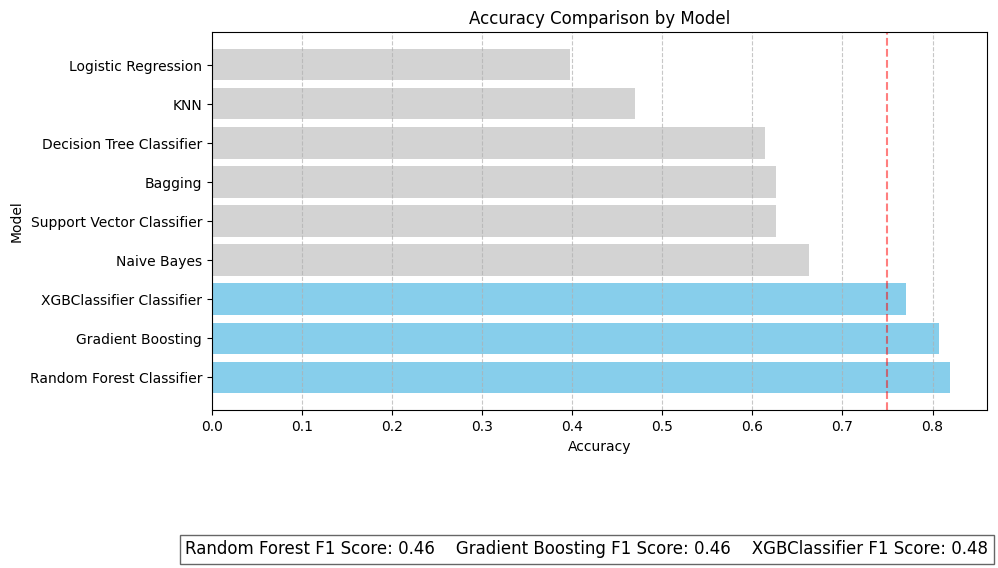

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def custom_accuracy(y_true, y_pred):
    # Calculate the differences between true and predicted values
    differences = np.abs(y_true - y_pred)

    # For category 2, exact matches are required
    exact_matches = (y_true == 2) & (y_pred == 2)

    # For categories other than 2, consider differences less than or equal to 1 as hits
    near_matches = (y_true != 2) & (differences <= 1)

    # Combine exact and near matches
    accurate_predictions = exact_matches | near_matches

    # Calculate and return the mean accuracy
    return np.mean(accurate_predictions)

def custom_f1_score(y_true, y_pred):
    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum((y_true == y_pred) & (y_pred == 2))
    predicted_positives = np.sum(y_pred == 2)
    actual_positives = np.sum(y_true == 2)

    # Calculate precision and recall
    precision = true_positives / (predicted_positives + 1e-10)  # Add a small value to avoid division by zero
    recall = true_positives / (actual_positives + 1e-10)  # Add a small value to avoid division by zero

    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)  # Add a small value to avoid division by zero
    return f1_score

# Dictionary to store the DataFrames and accuracy scores
accuracy_scores = {}
f1_scores = {}

# Define models
models = ['Logistic Regression', 'Random Forest Classifier', 'KNN', 'Support Vector Classifier',
          'Naive Bayes', 'Gradient Boosting', 'Decision Tree Classifier', 'Bagging', 'XGBClassifier Classifier']

for i, model in enumerate(models):
    file_path = f"/content/drive/MyDrive/KDT/중간 프로젝트/완성코드/최종완성코드/combined_df_3_v004/1combined_df_{i}_v004.xlsx"
    try:
        # Read the Excel file
        df = pd.read_excel(file_path)

        # Calculate accuracy
        y_true = df['Category']
        y_pred = df['Mode_K']
        accuracy = custom_accuracy(y_true, y_pred)

        accuracy_scores[model] = accuracy

        # Calculate F1 score for specific models
        if model in ['Random Forest Classifier', 'Gradient Boosting', 'XGBClassifier Classifier']:
            f1_score = custom_f1_score(y_true, y_pred)
            f1_scores[model] = f1_score

    except Exception as e:
        # Handle exceptions (e.g., file not found, read error)
        print(f"Error reading {file_path}: {e}")

# Convert accuracy scores dictionary to a DataFrame
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# Sort DataFrame by accuracy values
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Plot accuracy scores with custom colors
plt.figure(figsize=(10, 6))
colors = ['skyblue' if acc >= 0.75 else 'lightgray' for acc in accuracy_df['Accuracy']]
plt.barh(accuracy_df.index, accuracy_df['Accuracy'], color=colors)
plt.axvline(x=0.75, color='red', linestyle='--', alpha=0.5)
plt.title('Accuracy Comparison by Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the subplot to add space for the text box
plt.subplots_adjust(bottom=0.25)

# Add F1 score text for Random Forest Classifier, Gradient Boosting, and XGBClassifier
rf_f1 = f1_scores.get('Random Forest Classifier', 'N/A')
gb_f1 = f1_scores.get('Gradient Boosting', 'N/A')
xgb_f1 = f1_scores.get('XGBClassifier Classifier', 'N/A')
plt.figtext(0.5, 0.01, f'Random Forest F1 Score: {rf_f1:.2f}    Gradient Boosting F1 Score: {gb_f1:.2f}    XGBClassifier F1 Score: {xgb_f1:.2f}',
            ha='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6))

plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

def custom_accuracy(y_true, y_pred):
    # 예측과 실제 값의 차이를 계산
    differences = np.abs(y_true - y_pred)

    # 2인 경우에는 정확하게 일치해야 함
    exact_matches = (y_true == 2) & (y_pred == 2)

    # 2가 아닌 경우에는 차이가 1 이하인 경우를 적중으로 간주
    near_matches = (y_true != 2) & (differences <= 1)

    # 적중한 경우를 결합
    accurate_predictions = exact_matches | near_matches

    # 적중한 경우의 비율을 계산하여 반환
    return np.mean(accurate_predictions)

def custom_precision(y_true, y_pred):
    # 정확하게 일치하는 경우와 차이가 1 이하인 경우를 모두 포함하여 양성 예측을 계산
    true_positives = np.sum(((y_true == 2) & (y_pred == 2)) | ((y_true != 2) & (np.abs(y_true - y_pred) <= 1)))
    predicted_positives = np.sum((y_pred == 2) | (np.abs(y_true - y_pred) <= 1))

    if predicted_positives == 0:
        return 0

    return true_positives / predicted_positives

def custom_recall(y_true, y_pred):
    # 정확하게 일치하는 경우와 차이가 1 이하인 경우를 모두 포함하여 실제 양성을 계산
    true_positives = np.sum(((y_true == 2) & (y_pred == 2)) | ((y_true != 2) & (np.abs(y_true - y_pred) <= 1)))
    actual_positives = np.sum((y_true == 2) | (np.abs(y_true - y_pred) <= 1))

    if actual_positives == 0:
        return 0

    return true_positives / actual_positives

def custom_f1(y_true, y_pred):
    precision = custom_precision(y_true, y_pred)
    recall = custom_recall(y_true, y_pred)

    if precision + recall == 0:
        return 0

    return 2 * (precision * recall) / (precision + recall)

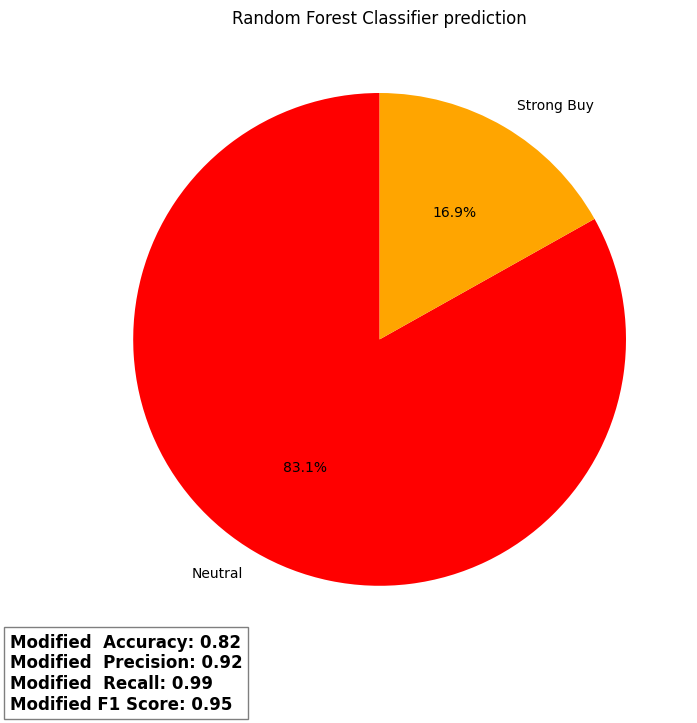

In [ ]:
# 엑셀 파일 불러오기
df = pd.read_excel("/content/drive/MyDrive/KDT/중간 프로젝트/완성코드/최종완성코드/combined_df_3_v004/1combined_df_1_v004.xlsx")


# Calculate accuracy
y_true = df['Category']
y_pred = df['Mode_K']
accuracy = custom_accuracy(y_true, y_pred)
if accuracy >= 0.75:
    precision, recall, f1 = custom_precision(y_true, y_pred), custom_recall(y_true, y_pred), custom_f1(y_true, y_pred)
    accuracy_scores[model] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


# MODE_K 열에서 각 항목의 개수 세기
count_mode_k = df['Mode_K'].replace({
    0: 'Strong Sell',
    1: 'Sell',
    2: 'Neutral',
    3: 'Buy',
    4: 'Strong Buy'
}).value_counts()

# 각 항목의 개수를 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
count_mode_k.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'gray', 'lightblue', 'blue'])
plt.title('Random Forest Classifier prediction')
plt.ylabel('')  # y축 라벨 제거

plt.text(-1.5, -1.5, f"Modified  Accuracy: {accuracy:.2f}\nModified  Precision: {precision:.2f}\nModified  Recall: {recall:.2f}\nModified F1 Score: {f1:.2f}",
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12, weight='bold')
plt.show()

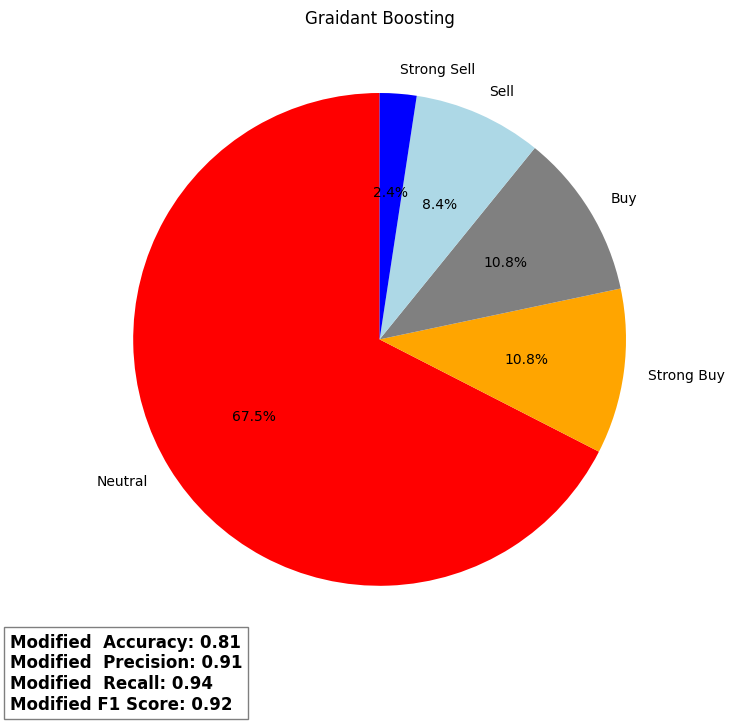

In [ ]:
# 엑셀 파일 불러오기
df = pd.read_excel("/content/drive/MyDrive/KDT/중간 프로젝트/완성코드/최종완성코드/combined_df_3_v004/1combined_df_5_v004.xlsx")


# Calculate accuracy
y_true = df['Category']
y_pred = df['Mode_K']
accuracy = custom_accuracy(y_true, y_pred)
if accuracy >= 0.75:
    precision, recall, f1 = custom_precision(y_true, y_pred), custom_recall(y_true, y_pred), custom_f1(y_true, y_pred)
    accuracy_scores[model] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


# MODE_K 열에서 각 항목의 개수 세기
count_mode_k = df['Mode_K'].replace({
    0: 'Strong Sell',
    1: 'Sell',
    2: 'Neutral',
    3: 'Buy',
    4: 'Strong Buy'
}).value_counts()

# 각 항목의 개수를 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
count_mode_k.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'gray', 'lightblue', 'blue'])
plt.title('Graidant Boosting')
plt.ylabel('')  # y축 라벨 제거

plt.text(-1.5, -1.5, f"Modified  Accuracy: {accuracy:.2f}\nModified  Precision: {precision:.2f}\nModified  Recall: {recall:.2f}\nModified F1 Score: {f1:.2f}",
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12, weight='bold')
plt.show()

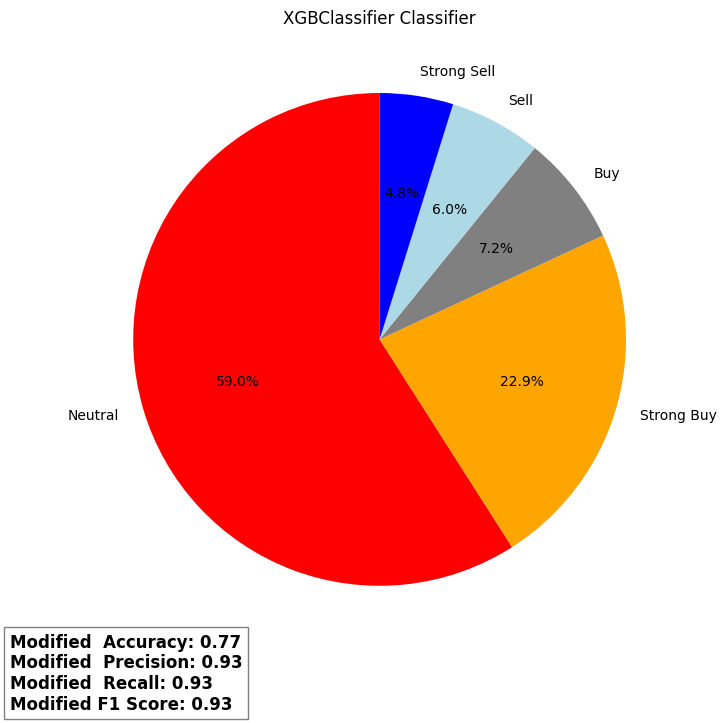

In [ ]:
# 엑셀 파일 불러오기
df = pd.read_excel("/content/drive/MyDrive/KDT/중간 프로젝트/완성코드/최종완성코드/combined_df_3_v004/1combined_df_8_v004.xlsx")


# Calculate accuracy
y_true = df['Category']
y_pred = df['Mode_K']
accuracy = custom_accuracy(y_true, y_pred)
if accuracy >= 0.75:
    precision, recall, f1 = custom_precision(y_true, y_pred), custom_recall(y_true, y_pred), custom_f1(y_true, y_pred)
    accuracy_scores[model] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


# MODE_K 열에서 각 항목의 개수 세기
count_mode_k = df['Mode_K'].replace({
    0: 'Strong Sell',
    1: 'Sell',
    2: 'Neutral',
    3: 'Buy',
    4: 'Strong Buy'
}).value_counts()

# 각 항목의 개수를 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
count_mode_k.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'gray', 'lightblue', 'blue'])
plt.title('XGBClassifier Classifier')
plt.ylabel('')  # y축 라벨 제거

plt.text(-1.5, -1.5, f"Modified  Accuracy: {accuracy:.2f}\nModified  Precision: {precision:.2f}\nModified  Recall: {recall:.2f}\nModified F1 Score: {f1:.2f}",
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12, weight='bold')
plt.show()